### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1) Which variables are significant in predicting the demand for shared bikes
    2) How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### The steps to be followed in this exercise are as follows:

1) Reading, understanding and visualizing the data

2) Preparing the data for model training (train-test split, rescaling)

3) Training the model

4) Residual analysis

5) Prediction and evaluation of the test set

#### Step 1: Reading and Understanding of data

    1. Importing the required libraries
    2. Understanding the structure of the data

In [50]:
#importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

###### Reading and interpreting the dataset

In [51]:
#Reading the dataset

df = pd.read_csv("day.csv")

In [52]:
#checking the data

df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
#checking the shape of the dataset 

df.shape

(730, 16)

In [54]:
#checking the description of the dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [55]:
#checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [56]:
#checking for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Visualisation of the data

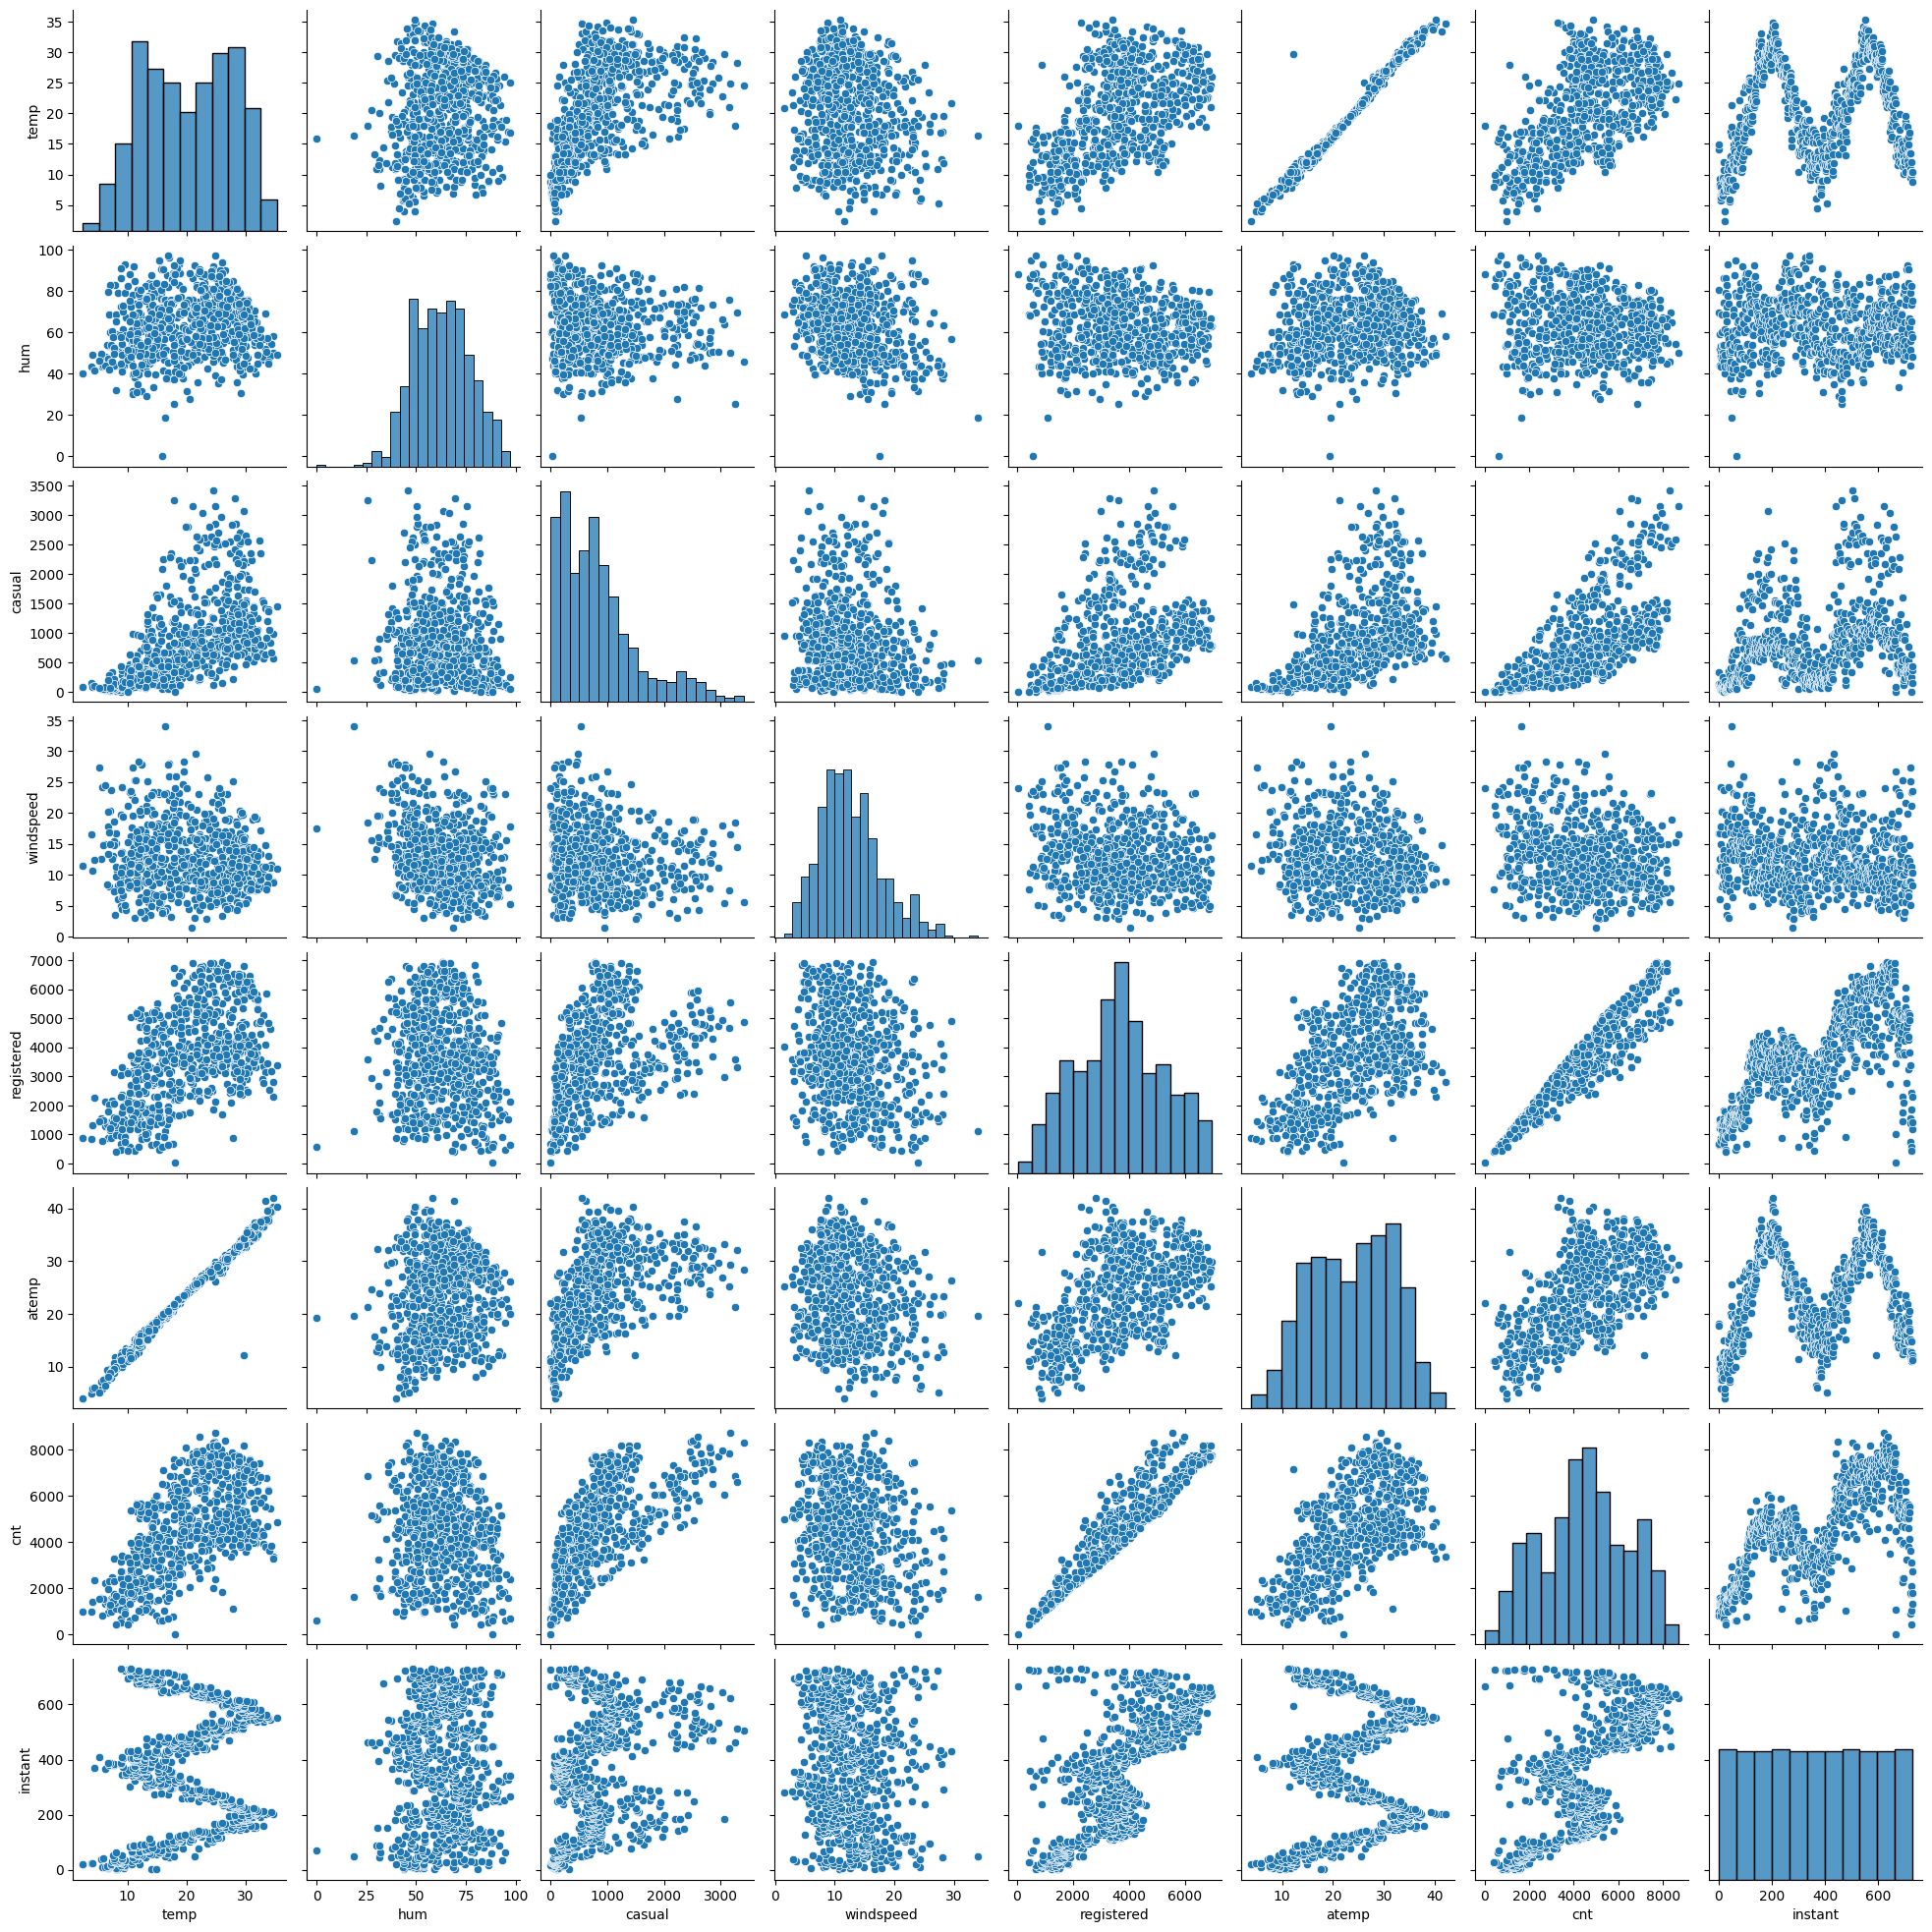

In [57]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

As we can see from the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further. 

In [58]:
#mapping categorical variables with their subcategories to help with visualization analysis 
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


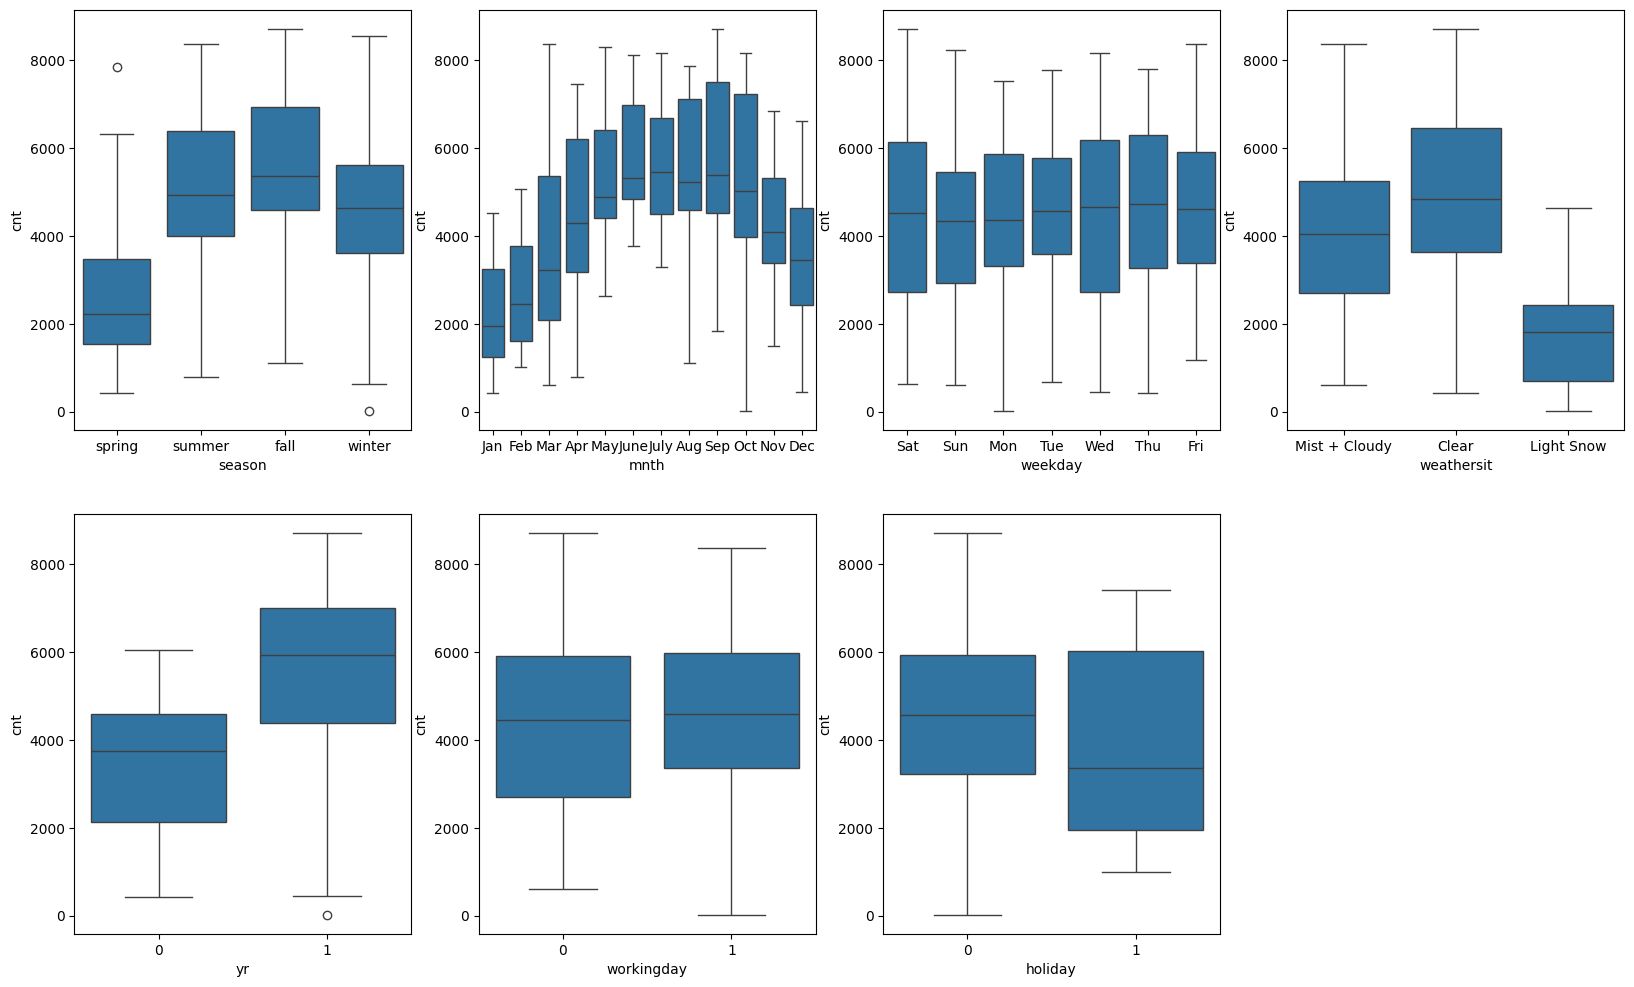

In [59]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

##### Some of the observations from the plots above are as follows:

1) People are more likely to rent bikes in the summer and the fall season

2) Bike rental rates are the most in September and October

3) Saturday, Wednesday and Thursday are the days where more bikes are rented

4) Most bike rentals take place in the clear weather 

5) More bikes were rented in 2019

6) There is no big discernable difference in bike rental rates depending on whether it's a working day or not

7) Bike rental rates are higher on holidays

As we can see, there are several variables correlated to count variable (cnt) such as registered, casual, temp, atemp, yr, workingday, we can thereby conduct a linear regresssion model

In [61]:
#dropping the un-required variables from the dataset 
#dropping the variables atemp, instant, dteday, casual, registered as they are not needed for the analysis 
#atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [62]:
#checking the type, info, description, missing values, shape of the dataset
df.shape

(730, 11)

In [63]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [65]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [66]:
#creating dummy variables 
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)

In [67]:
#adding the dummy variables to the original dataframe
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,True,False,False,True,False,False


In [68]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,True,False,False,True,False,False
5,0,0,1,8.378268,51.8261,6.000868,1606,False,False,False,...,False,False,True,False,False,False,False,True,False,False
6,0,0,1,8.057402,49.8696,11.304642,1510,False,False,False,...,False,False,False,False,False,False,True,True,False,False
7,0,0,0,6.765000,53.5833,17.875868,959,False,False,False,...,True,False,False,False,False,False,True,True,False,False
8,0,0,0,5.671653,43.4167,24.250650,822,False,False,False,...,False,True,False,False,False,False,False,True,False,False
9,0,0,1,6.184153,48.2917,14.958889,1321,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [69]:
#checking the shape, info of the dataset and also checking the correlation of variables in a heatmap 
df.shape

(730, 29)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    bool   
 8   Dec            730 non-null    bool   
 9   Feb            730 non-null    bool   
 10  Jan            730 non-null    bool   
 11  July           730 non-null    bool   
 12  June           730 non-null    bool   
 13  Mar            730 non-null    bool   
 14  May            730 non-null    bool   
 15  Nov            730 non-null    bool   
 16  Oct            730 non-null    bool   
 17  Sep            730 non-null    bool   
 18  Mon       

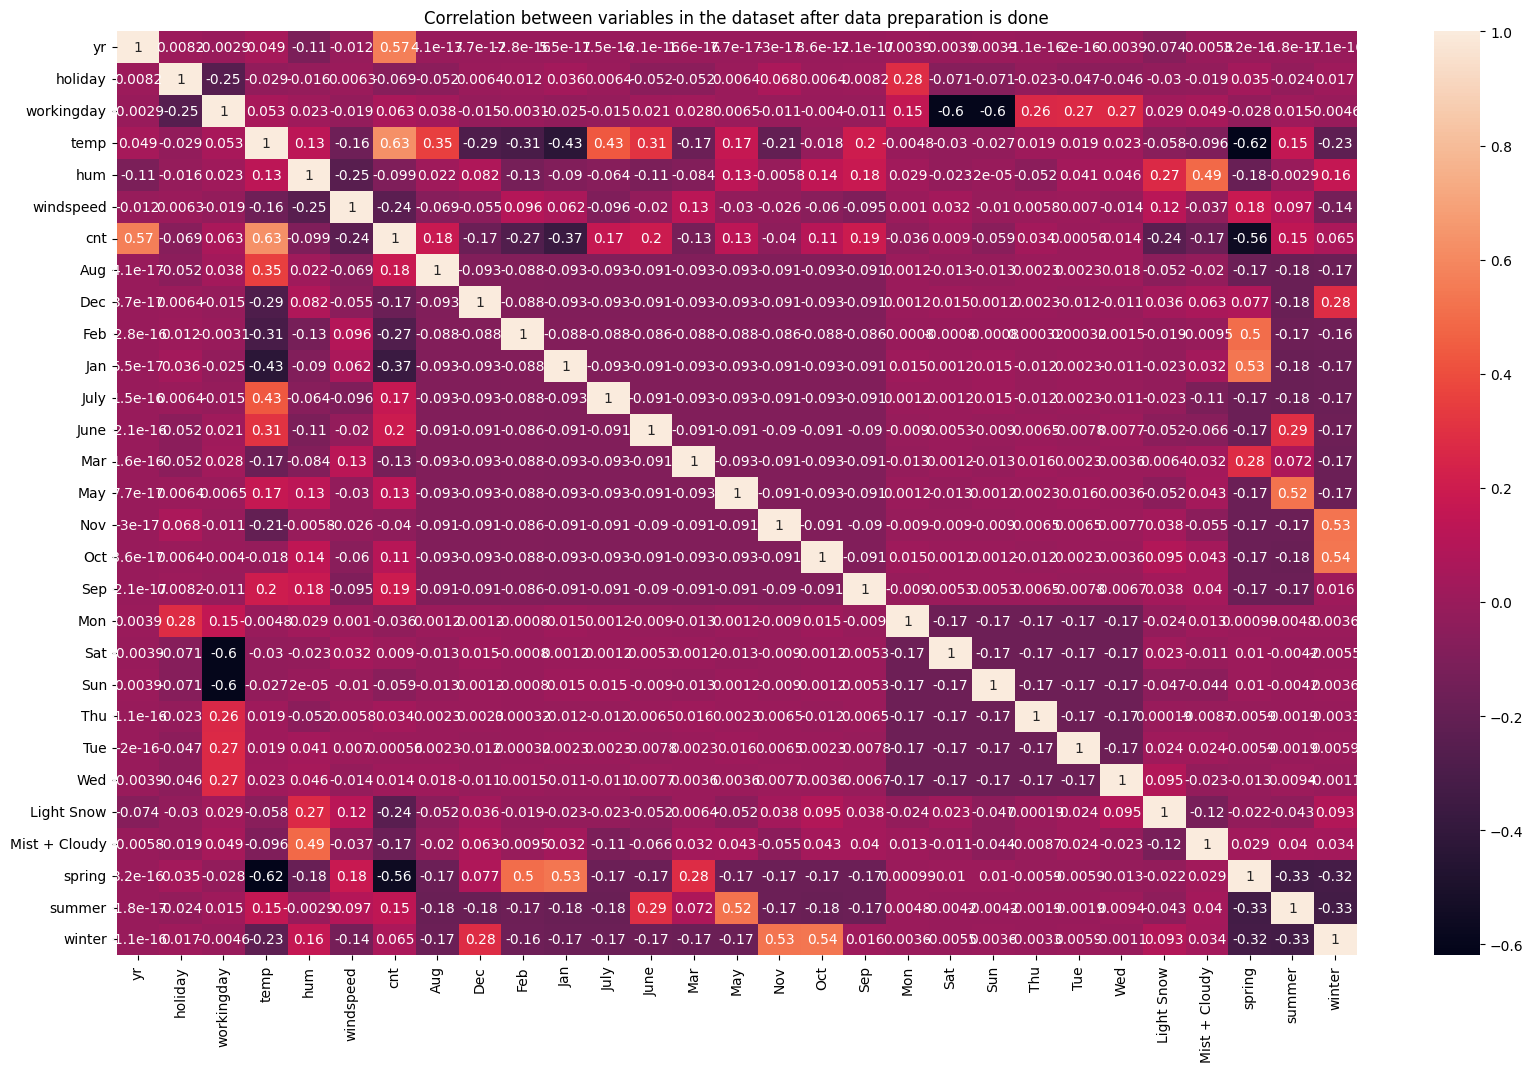

In [72]:
#making a heatmap to showcase correlation between the new variables 
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),  annot=True)
plt.title('Correlation between variables in the dataset after data preparation is done')
plt.show()

#### Step 2: Preparing the data for model training (train-test split, rescaling)

In [73]:
#splitting the dataset into train and test sets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [74]:
#checking the shape of the training dataset
df_train.shape

(510, 29)

In [75]:
#checking the shape of the test dataset
df_test.shape

(220, 29)

##### Scaling the variables

In [76]:
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [77]:
#checking the normalized values of the train set after performing scaling 
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the max amount is 1 in all cases of the variables which is an indication that our rescaling process has worked

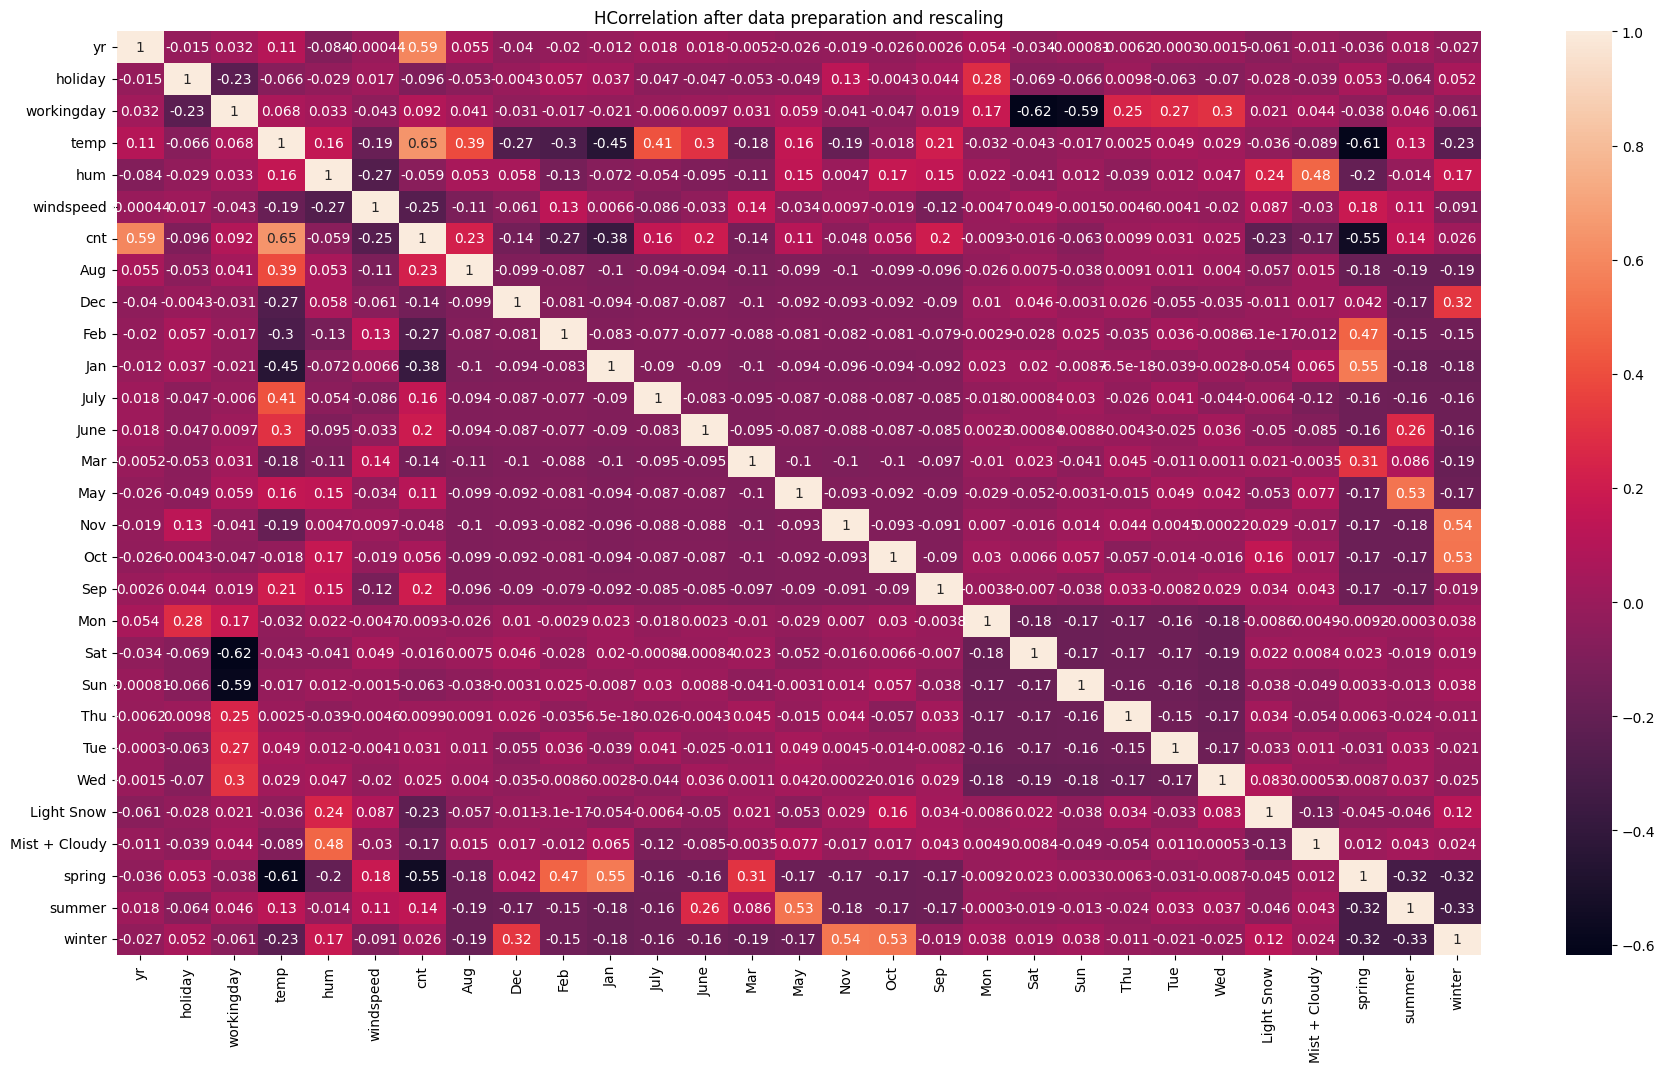

In [80]:
# checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), annot=True)
plt.title('Correlation after data preparation and rescaling')
plt.show()

As we can see from the heatmap, the count seems to be heavily correlated with the temp variable. We will now observe the variance using pairplots

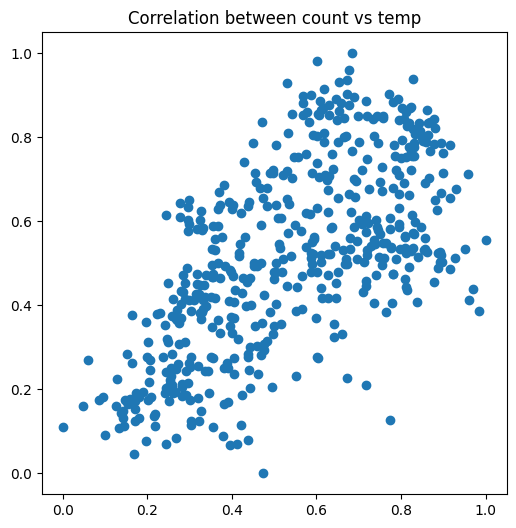

In [81]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

#### Step 3: Training the model

In [82]:
#building our first model using the variable temp
#preparing the variables for model building 

y_train = df_train.pop('cnt')
X_train = df_train

In [83]:
#checking the variables
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [84]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.498067,0.663106,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.751824,0.380981,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [85]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [86]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.46e-61
Time:                        21:53:57   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is .416 which means 41% of the variance in the count quantity is explained by temp

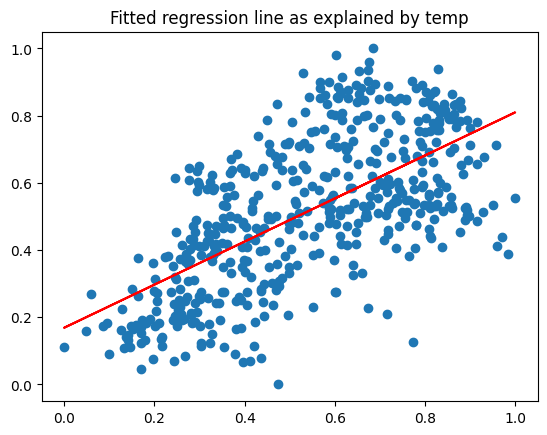

In [87]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [88]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [89]:
#checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.34e-130
Time:                        21:54:12   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now .692 which means 69% of the variance in the count quantity is explained by temperature and year data

In [90]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [92]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [93]:
#checking summary with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.00e-181
Time:                        21:55:36   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.00e+15
================================================================

R-squared is now .853 which means 85% of the variance in the count quantity is explained with all the variables

##### Using RFE:

We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop. 

In [95]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [96]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [97]:
#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]

In [98]:
#checking the values of true_rfe
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [99]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [105]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe.astype(float))

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.199526
yr               0.229763
holiday         -0.018447
workingday       0.083669
temp             0.527708
hum             -0.161086
windspeed       -0.180875
July            -0.054616
Sep              0.081983
Sat              0.093668
Sun              0.040636
Light Snow      -0.245009
Mist + Cloudy   -0.056344
spring          -0.055546
summer           0.053733
winter           0.099214
dtype: float64

In [101]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.00e-181
Time:                        21:56:26   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.00e+15
================================================================

In [102]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [104]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,50.68
8,Sat,12.20
9,Sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Mist + Cloudy,1.57


##### How to check the conditions for variables elimination?
Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

- High p-value, high VIF : definitely drop
- High-Low:

     1) High p, low VIF : remove these first, then build model again and check VIF again      
     2) Low p, high VIF : remove these later          
- Low p-value, low VIF : keep variable

In [107]:
#workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [108]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1.astype(float))

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        21:59:21   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2832      0.034      8.300      0.000       0.216       0.350
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0100      0.011      0.897      0.370      -0.012       0.032
Sun              -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [110]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,74.92
12,spring,5.02
3,temp,3.62
14,winter,3.49
13,summer,2.62
4,hum,1.91
11,Mist + Cloudy,1.57
6,July,1.49
7,Sep,1.30
10,Light Snow,1.25


In [111]:
#Sat variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

In [112]:
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2.astype(float))

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.12e-192
Time:                        21:59:35   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2858      0.034      8.409      0.000       0.219       0.353
yr                0.2295      0.008     28.639      0.000       0.214       0.245
holiday          -0.1041      0.025     -4.118      0.000      -0.154      -0.054
temp              0.5273      0.033     15.876      0.000       0.462       0.593
hum              -0.1623      0.037     -4.349      0.000      -0.236      -0.089
windspeed        -0.1801      0.025     -7.092      0.000      -0.230      -0.130
July             -0.0543      0.018     -3.004      0.003      -0.090      -0.019
Sep               0.0821      0.017      4.974      0.000       0.050       0.115
Sun              -0.0449      0.011     -3.952      0.000      -0.067      -0.023
Light Snow       -0.2447      0.026     -9.385      0.000      -0.296      -0.193
Mist + Cloudy    -0.0562      0.010     -5.411      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.696      0.007      -0.096      -0.015
summer            0.0537      0.015      3.627      0.000       0.025       0.083
winter            0.0995      0.017      5.834      0.000       0.066       0.133
==============================================================================
Omnibus:                       61.336   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.517
Skew:                          -0.618   Prob(JB):                     4.62e-34
Kurtosis:                       5.387   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [114]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,28.24
2,temp,16.04
4,windspeed,4.66
10,spring,4.01
12,winter,3.34
11,summer,2.79
9,Mist + Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


In [115]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [116]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.45e-189
Time:                        21:59:48   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2060      0.029      7.074      0.000       0.149       0.263
yr                0.2335      0.008     28.807      0.000       0.218       0.249
holiday          -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp              0.4907      0.033     15.004      0.000       0.426       0.555
windspeed        -0.1479      0.025     -5.981      0.000      -0.196      -0.099
July             -0.0492      0.018     -2.680      0.008      -0.085      -0.013
Sep               0.0760      0.017      4.541      0.000       0.043       0.109
Sun              -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light Snow       -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.517      0.000      -0.099      -0.065
spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer            0.0475      0.015      3.171      0.002       0.018       0.077
winter            0.0848      0.017      4.984      0.000       0.051       0.118
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [118]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.81
4,July,1.59
8,Mist + Cloudy,1.56
5,Sep,1.34
6,Sun,1.18


In [119]:
#windspeed variable can be dropped due to high p value and negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

In [120]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.83e-183
Time:                        21:59:59   Log-Likelihood:                 489.93
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     498   BIC:                            -905.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1567      0.029      5.424      0.000       0.100       0.213
yr                0.2325      0.008     27.741      0.000       0.216       0.249
holiday          -0.1080      0.027     -4.059      0.000      -0.160      -0.056
temp              0.5026      0.034     14.887      0.000       0.436       0.569
July             -0.0495      0.019     -2.606      0.009      -0.087      -0.012
Sep               0.0803      0.017      4.645      0.000       0.046       0.114
Sun              -0.0484      0.012     -4.055      0.000      -0.072      -0.025
Light Snow       -0.3042      0.025    -12.131      0.000      -0.354      -0.255
Mist + Cloudy    -0.0805      0.009     -9.016      0.000      -0.098      -0.063
spring           -0.0749      0.021     -3.490      0.001      -0.117      -0.033
summer            0.0377      0.015      2.446      0.015       0.007       0.068
winter            0.0859      0.018      4.884      0.000       0.051       0.121
==============================================================================
Omnibus:                       70.260   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.572
Skew:                          -0.672   Prob(JB):                     5.61e-43
Kurtosis:                       5.712   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [122]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.27
0,yr,2.06
9,summer,1.95
10,winter,1.61
3,July,1.59
7,Mist + Cloudy,1.56
8,spring,1.43
4,Sep,1.34
5,Sun,1.18
6,Light Snow,1.07


In [123]:
#July is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)

In [124]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.14e-183
Time:                        22:00:09   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     499   BIC:                            -904.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1487      0.029      5.145      0.000       0.092       0.205
yr                0.2330      0.008     27.652      0.000       0.216       0.250
holiday          -0.1071      0.027     -4.002      0.000      -0.160      -0.055
temp              0.4900      0.034     14.580      0.000       0.424       0.556
Sep               0.0938      0.017      5.647      0.000       0.061       0.126
Sun              -0.0495      0.012     -4.130      0.000      -0.073      -0.026
Light Snow       -0.3052      0.025    -12.099      0.000      -0.355      -0.256
Mist + Cloudy    -0.0792      0.009     -8.832      0.000      -0.097      -0.062
spring           -0.0637      0.021     -3.012      0.003      -0.105      -0.022
summer            0.0525      0.014      3.646      0.000       0.024       0.081
winter            0.0981      0.017      5.749      0.000       0.065       0.132
==============================================================================
Omnibus:                       72.159   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.039
Skew:                          -0.703   Prob(JB):                     1.99e-42
Kurtosis:                       5.657   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [126]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.97
0,yr,2.06
8,summer,1.64
6,Mist + Cloudy,1.55
9,winter,1.46
7,spring,1.35
3,Sep,1.23
4,Sun,1.18
5,Light Snow,1.07
1,holiday,1.05


1. We choose the model based on several criteria, such as the p-value, the VIF, and the R-squared value. The p-value tells us how significant the variables are, the VIF measures the correlation among the variables, and the R-squared value indicates how well the model fits the data. This value shows how much of the variation in the dependent variable is explained by the independent variables together.
2. The very low (<0.05) p-value of all the chosen variables allows us to discard the null hypothesis.
3. The VIF is usually expected to be <5, and we have met that requirement with all the variables.
4. The R-squared value we obtained is 82.7%, which implies a strong relationship between the dependent variable (count) and the independent variables, and that the variables we selected can accurately capture the variation of the dependent variable.

#### Step 4: Residual analysis

In [127]:
X_train_lr5 = sm.add_constant(X_train_lr5)
#X_train_lm5.columns
X_train_lr5

,const,yr,holiday,temp,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1.0,0.0,0.815169,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.442393,0.0,0.0,0.0,1.0,1.0,0.0,0.0
728,1.0,1.0,0.0,0.245101,0.0,1.0,0.0,0.0,1.0,0.0,0.0
482,1.0,1.0,0.0,0.395666,0.0,0.0,0.0,1.0,0.0,1.0,0.0
111,1.0,0.0,0.0,0.345824,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,0.0,0.863973,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,0.0,0.0,0.202618,0.0,0.0,0.0,0.0,1.0,0.0,0.0
350,1.0,0.0,0.0,0.248216,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79,1.0,0.0,0.0,0.462664,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [128]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

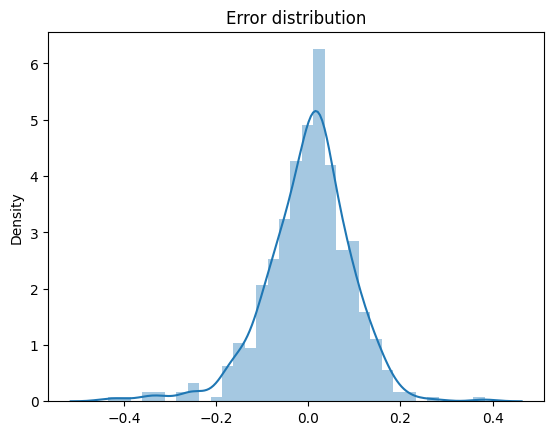

In [129]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

Making Predictions on the testing set

In [130]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [131]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [132]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [133]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test

In [134]:
#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [135]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.610133,0.153728,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.837699,0.334206,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.437098,0.339570,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [136]:
#Printing feature variables

X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Sep', 'Sun', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [137]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [138]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [139]:
#making predictions
y_pred = lr_model.predict(X_test_new)

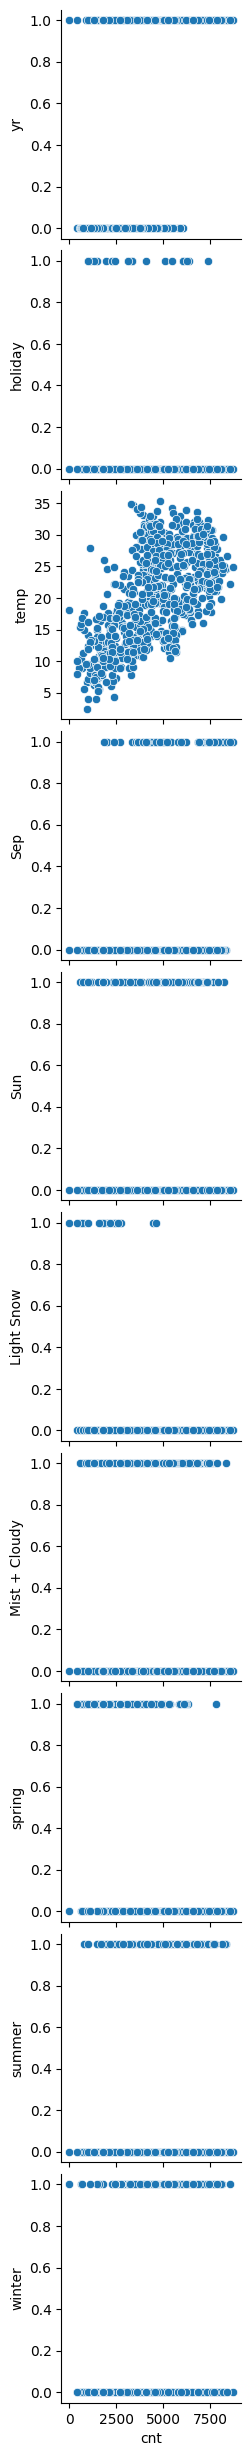

<Figure size 2000x1500 with 0 Axes>

In [141]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (20, 15))
plt.show()

1. It is evident that temperature has a direct correlation with the dependent variable (cnt).
2. As we noted before, all the variables in our selected model have a VIF<5, which confirms that there is no multicollinearity.
3. The error distribution as seen above is normal (that is, centered at 0), which meets another requirement of linear regression.
4. Temperature and the dependent variable (cnt) show a linear association.
5. We have verified earlier that none of the variables in our chosen model have a VIF above 5, which indicates that there is no multicollinearity.
6. The error distribution as displayed above is normal (in other words, clustered around 0), which satisfies another condition of linear regression.
7. There is a linear link between temperature and the dependent variable (cnt).
We have checked earlier that every variable in our selected model has a VIF below 5, which demonstrates that there is no multicollinearity.
8. The error distribution as presented above is normal (meaning, concentrated at 0), which fulfills another criterion of linear regression.

#### Step 5: Prediction and evaluation of the test set

In [142]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8113189584286533


In [143]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8271252564127047


###### Equation of the best fitted line is:
    cnt = 0.2330×yr + 0.4900×temp - 0.1071×holiday + 0.0938×Sep - 0.0495×Sun - 0.3052×LightSnow - 0.0792×MistCloudy - 0.0637×spring + 0.0525×summer + 0.0981×winter + 0.1487


    

In [150]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008689716000619054
Mean squared error of the test set is 0.00902164805945192


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

Conclusions -

Summary:
After data analysis, preparation, modeling, and testing, we found that:

Our model fits the data well, with good R-squared values 
Our model predicts the variance accurately, with near-zero mean squared error for both sets. We used p-values, VIF, and RFE to select the best variables.
Bike demand depends on temperature, workingday, season, month, day, and holiday. Winter has more rentals than summer and spring. September and October are popular months. Wed, Thurs, and Sat are busy days.
We suggest more marketing in summer and spring, and more incentives on cloudy days. We need to retain repeat customers as rentals increased from 2018 to 2019.
Summary:
We did data processing, modeling, and evaluation, and discovered that:

Our model explains the data well, with R-squared values of 82.71% and 81.13% for train and test sets respectively.
Our model predicts the variance well, with almost zero mean squared error for both sets. We used p-values, VIF, and RFE to choose the best variables.
Bike demand varies with temperature, workingday, season, month, day, and holiday. Winter has more rentals than summer and spring. September and October are high-demand months. Wed, Thurs, and Sat are peak days.
We recommend more promotion in summer and spring, and more deals on cloudy days. We need to keep repeat customers as rentals grew from 2018 to 2019.